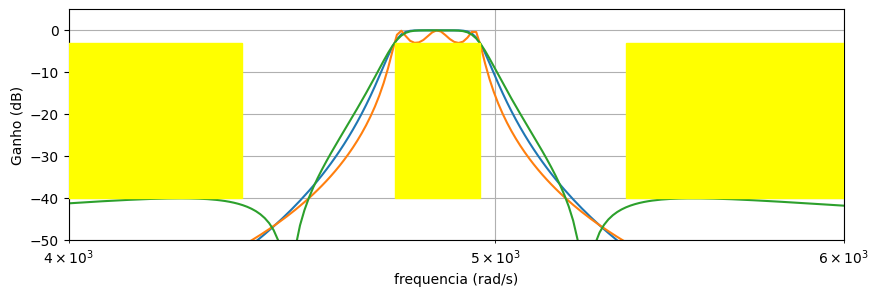

In [ ]:
# importa bibliotecas
import numpy as np, matplotlib.pyplot as plt, scipy as sp

# ==============================================
# 1. especificações do filtro
Gp = -3 # dB, ganho na banda de passagem
Gr = -40 # dB, ganho na banda de rejeição

wr1 = 1394*np.pi # rad/s, frequencia limite da banda de rejeição
wp1 = 1510*np.pi # rad/s, frequencia limite da banda de passagem
wp2 = 1579*np.pi # rad/s, frequencia limite da banda de passagem
wr2 = 1704*np.pi # rad/s, frequencia limite da banda de rejeição

Ap = -Gp # dB, ganho na banda de passagem
Ar = -Gr # dB, ganho na banda de rejeição
dp = 1 - 10**(Gp/20) # ondulação na banda de passagem
dr = 10**(Gr/20) # ondulação na banda de rejeição

fr1 = wr1/(2*np.pi) # Hz
fp1 = wp1/(2*np.pi) # Hz
fp2 = wp2/(2*np.pi) # Hz
fr2 = wr2/(2*np.pi) # Hz

# ==============================================
# 2. determinar ordem do filtro

ord1, wn1 = sp.signal.buttord(wp=[wp1, wp2], ws=[wr1, wr2], gpass=Ap, gstop=Ar, analog=True)
# outros filtros
ord2, wn2 = sp.signal.cheb1ord(wp=[wp1, wp2], ws=[wr1, wr2], gpass=Ap, gstop=Ar, analog=True)
ord3, wn3 = sp.signal.cheb2ord(wp=[wp1, wp2], ws=[wr1, wr2], gpass=Ap, gstop=Ar, analog=True)
ord4, wn4 = sp.signal.ellipord(wp=[wp1, wp2], ws=[wr1, wr2], gpass=Ap, gstop=Ar, analog=True)

# ==============================================
# 3. Aproximação do filtro
num1, den1 = sp.signal.butter(N=ord1, Wn=wn1, btype='bp', analog=True, output='ba')
filtro1 = sp.signal.lti(num1, den1)

num2, den2 = sp.signal.cheby1(N=ord2, rp=Ap, Wn=wn2, btype='bp', analog=True, output='ba')
filtro2 = sp.signal.lti(num2, den2)

num3, den3 = sp.signal.cheby2(N=ord3, rs=Ar, Wn=wn3, btype='bp', analog=True, output='ba')
filtro3 = sp.signal.lti(num3, den3)

# ==============================================
# 4. Analisar para ver se deu certo

w = np.logspace(3, 4, 1000)

w1, mag1, phase1 = sp.signal.bode(filtro1, w=w)
w2, mag2, phase2 = sp.signal.bode(filtro2, w=w)
w3, mag3, phase3 = sp.signal.bode(filtro3, w=w)


plt.figure(figsize=(10,3))
plt.semilogx(w1, mag1, label=r'butt (n=%d)'%(ord1))
plt.semilogx(w2, mag2, label=r'cheby1 (n=%d)'%(ord2))
plt.semilogx(w3, mag3, label=r'cheby1 (n=%d)'%(ord3))
plt.fill([min(w), min(w), wr1, wr1],[-Ar, -Ap, -Ap, -Ar], color='yellow', zorder=10)
plt.fill([wp1, wp1, wp2, wp2],[-Ar, -Ap, -Ap, -Ar], color='yellow', zorder=10)
plt.fill([wr2, wr2, max(w), max(w)],[-Ar, -Ap, -Ap, -Ar], color='yellow', zorder=10)
plt.ylabel('Ganho (dB)')
plt.xlabel('frequencia (rad/s)')
plt.ylim(-50, 5)
plt.xlim(4e3, 6e3)
plt.legend()
plt.grid(which='both');


In [ ]:
db=-100
10**(db/20)

1e-05